### <font color='red'> Airlines to Predict a Delay.
</font>

#### In this problem we need to see if we can predict if a flight will be delayed or not, we have a large database, our datasate has 539383 values and 9 columns, here we will use the database "Airlines.csv" that was made available to use, below you will see an analysis of the data, the processing of this data, the process to group variables and the use of Classifications models of machine learning to achieve our goal.

![](https://aeroin.net/wp-content/uploads/2022/04/Aeroregional-737-500-Goiania-22040502-1024x680.jpg)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [3]:
df = pd.read_csv('/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv', sep = ',')

#### After using the head function, we can see that this database has not null values (using the info function we can confirm this), our target variable is "delay", we can also see that we have Numerical and Categoricals variables.

#### Categorical Variables
##### Airline, AirportFrom, AirportTo, DayOfWeek and Delay

#### Continuous Variables
##### Id, Flight, Time and Length

In [4]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [8]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

## <font color='blue'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.

#### Checking the correlation between our variables, here we can see that we don't have a strong correlation between the variables.

<AxesSubplot:>

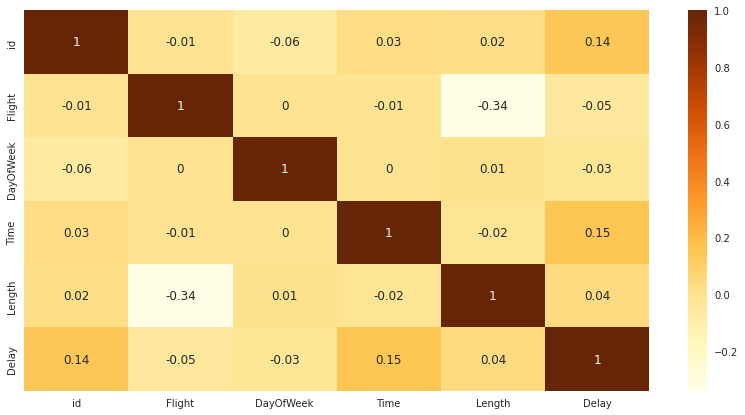

In [9]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### "Categorical Variables"

##### Airline: We can see that we have some airlines that fly much more than others, we can see that we have 18 Airlines in our database.

##### DayOfWeek: We don't have a big difference between the days, but is interesting to see that Wednesday and Thursday are the days that we have more fly.

##### Delay: Its interesting to see that our database has almost the same value in our variable target.

##### AirportFrom/AirportTo: here we can see which airports receive or make flights the most, we can see that we have 293 airports.

<AxesSubplot:xlabel='Delay', ylabel='count'>

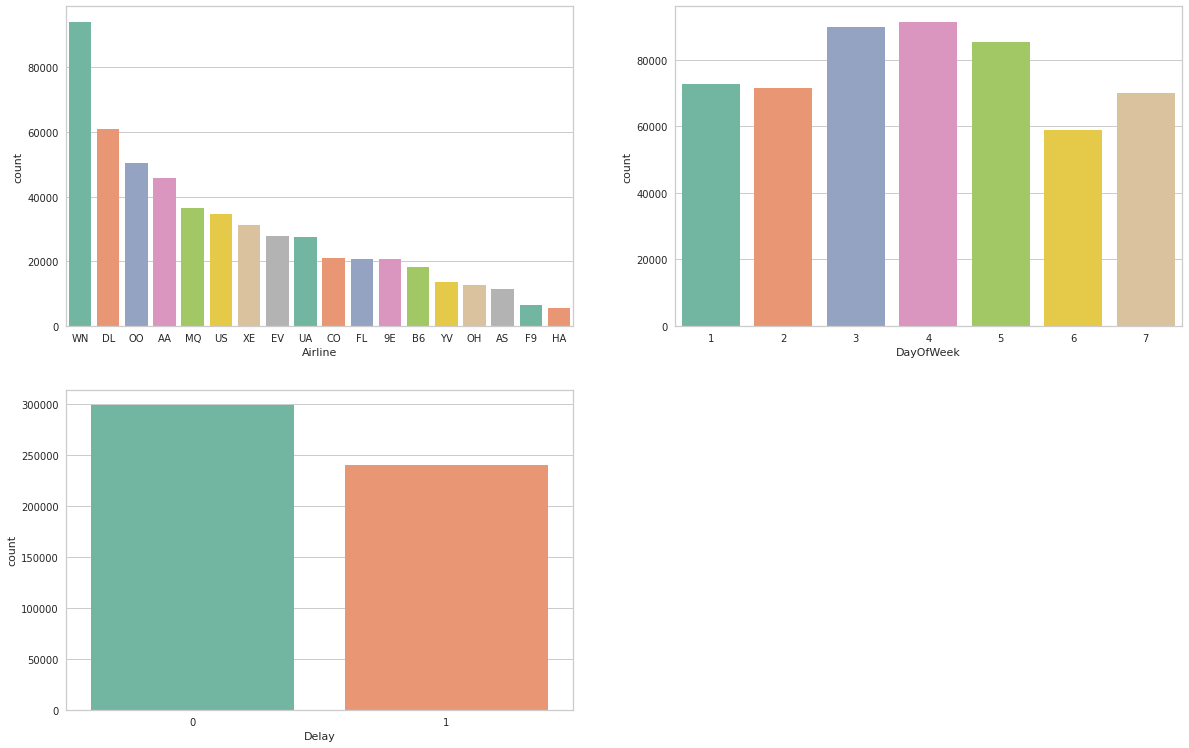

In [10]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)

plt.subplot(3,2,2)
sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Delay', palette='Set2', data = df)

In [11]:
dt_AirportFrom = df[['AirportFrom','id']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('id', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='id', )
fig.show()

In [12]:
dt_AirportTo = df[['AirportTo','id']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('id', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='id', )
fig.show()

In [13]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [14]:
len(df['Airline'].unique())

18

In [15]:
df['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [16]:
len(df['AirportFrom'].unique())

293

In [17]:
df['AirportTo'].value_counts()

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [18]:
len(df['AirportTo'].unique())

293

In [19]:
df['DayOfWeek'].value_counts()

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

In [20]:
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

#### "Continuous Variables"

#### Time: We can see that the Flights has a good distribuition for time, we don't have a predominance

#### Length: We can see that the length of the Flights usually is between 100-200 but the most part is around 150. 


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Length'>

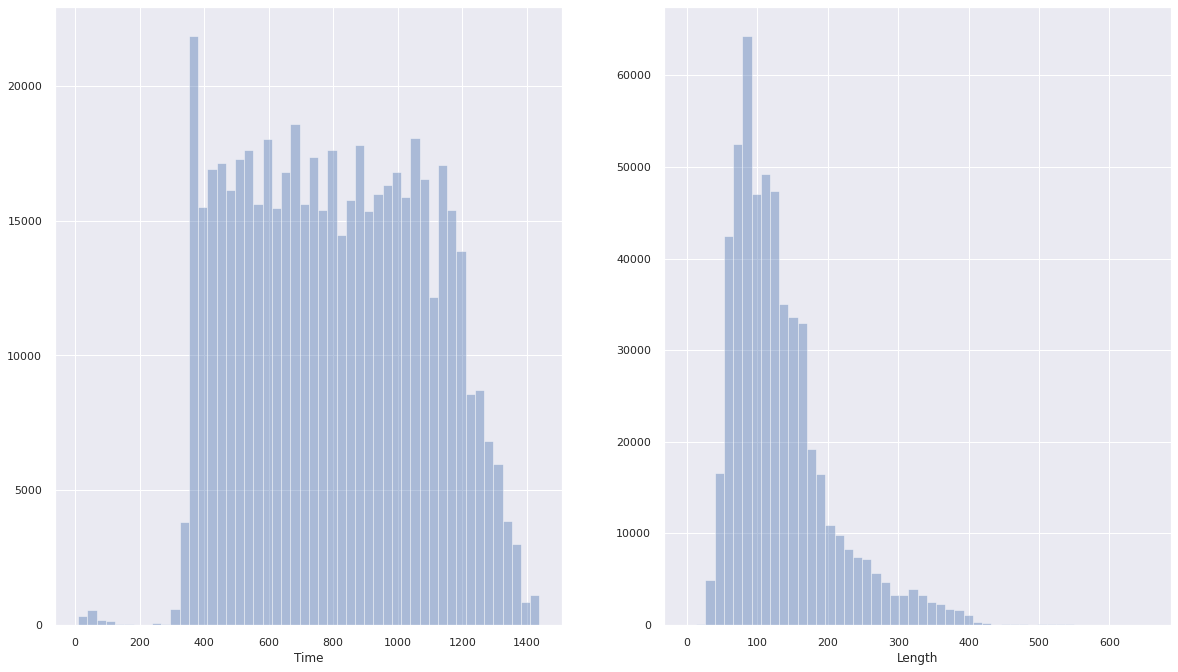

In [21]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df.Time, kde = False)

plt.subplot(2,2,2)
sns.distplot(df.Length, kde = False)

#### Bivariate Analysis

##### When we compare our variable target with others categorical variables, we can see some insights:

##### When we see our Variable Airline, we can see that we have some Airlines that has more delay than anothers, like WN, if you catch a fly from WN, probably your flight will be delayed, an interesting point is when we see the variable "DayOfWeek", we can see that we don't have much difference between the days, when we see the continuous variables we don't have a pattern.

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

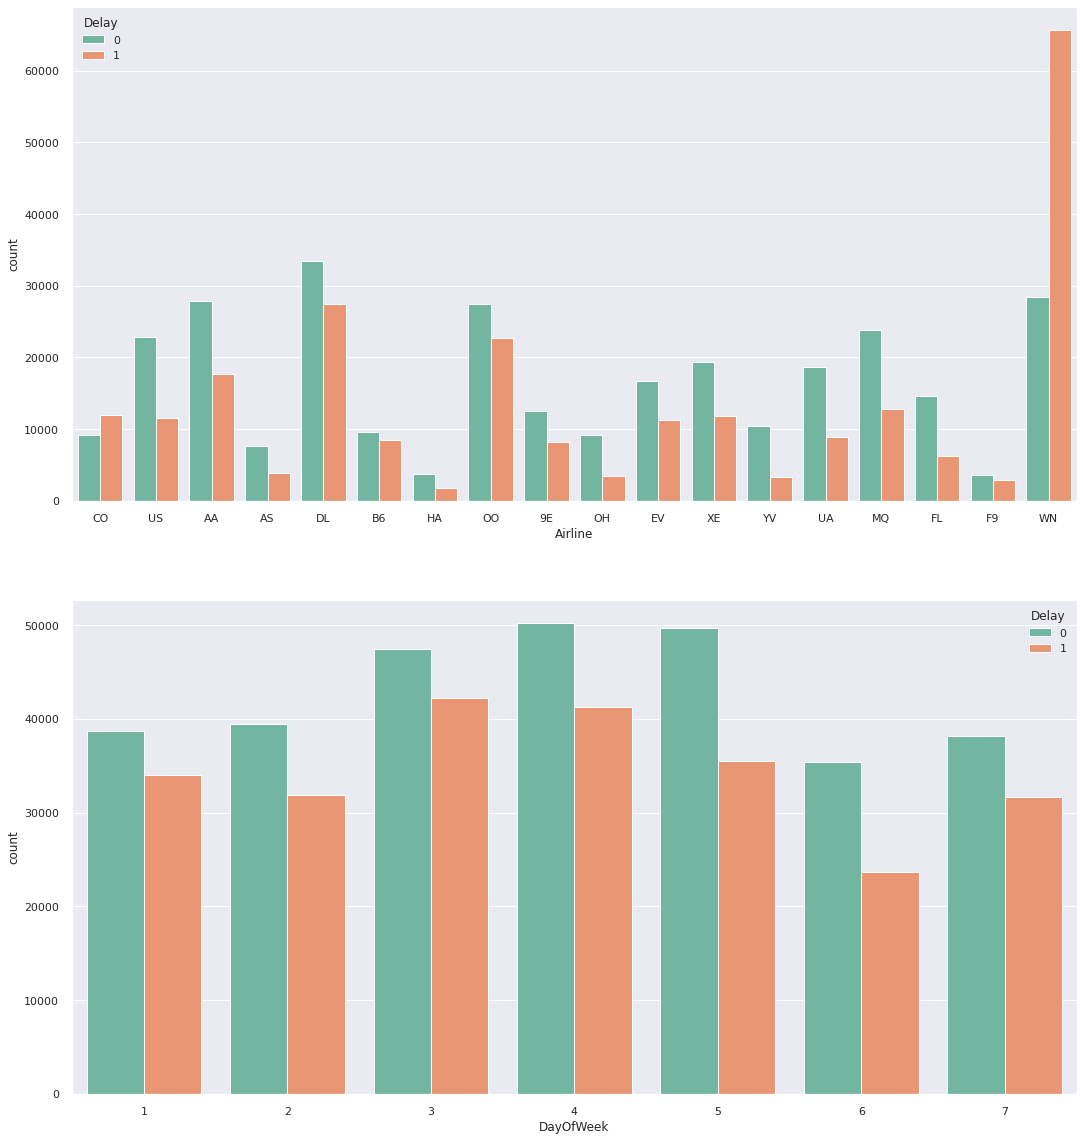

In [22]:
plt.figure(figsize = (18,20))

plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Delay', palette='Set2', data = df)

plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='Set2', data = df)

In [23]:
df_delay = df[df['Delay'] == 1]
dt_AirportFrom = df_delay[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='Delay')
fig.show()

In [24]:
df_dont_delay = df[df['Delay'] == 0]
dt_AirportFrom = df_dont_delay[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='Delay')
fig.show()

In [25]:
dt_AirportTo = df_delay[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='Delay')
fig.show()

In [26]:
dt_AirportTo = df_dont_delay[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='Delay')
fig.show()

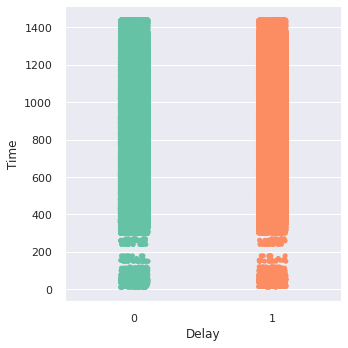

In [27]:
sns.catplot(x = "Delay", y = "Time", palette = "Set2", data = df)

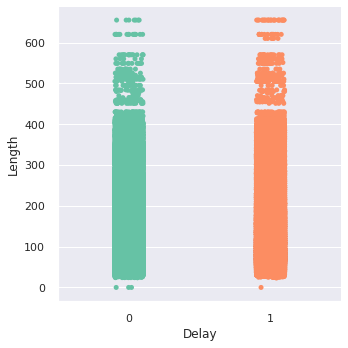

In [28]:
sns.catplot(x = "Delay", y = "Length", palette = "Set2", data = df)

## <font color='blue'> 3. Model Building. </font>

#### Here we will drop the Variables that we dont need to use in our models.

In [29]:
df = df.drop('id', 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



#### Separating into features variables and target variable.

In [30]:
X = df.iloc[:, 0:7].values

In [31]:
y = df.iloc[:, 7].values

#### Label Encoder

#### Using LabelEncoder to transform categorical variables into continuous variables.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder_airline = LabelEncoder()
label_encoder_airportfrom = LabelEncoder()
label_encoder_airportto = LabelEncoder()

In [34]:
X[:,0] = label_encoder_airline.fit_transform(X[:,0])
X[:,2] = label_encoder_airportfrom.fit_transform(X[:,2])
X[:,3] = label_encoder_airportto.fit_transform(X[:,3])

#### We will run the models before scaling the data, after we will back here to run the StandardScaler and MinMax Scaler and verify if we have best results using the scaling.

#### StandardScaler

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [109]:
X_standard[0]

array([-1.00530759, -1.04425823,  1.37168161, -0.11522128, -0.48555175,
       -2.83309217,  1.03823673])

#### MinMaxScaler

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
obj_norm = MinMaxScaler().fit(X)

In [142]:
X_normalization = obj_norm.transform(X)

In [143]:
X_normalization

array([[0.23529412, 0.0343018 , 0.86643836, ..., 0.33333333, 0.00349895,
        0.3129771 ],
       [0.82352941, 0.19928325, 0.74315068, ..., 0.33333333, 0.00349895,
        0.3389313 ],
       [0.05882353, 0.30705235, 0.52739726, ..., 0.33333333, 0.0069979 ,
        0.2519084 ],
       ...,
       [0.47058824, 0.07781902, 0.86643836, ..., 0.66666667, 1.        ,
        0.38931298],
       [0.76470588, 0.00985537, 0.43835616, ..., 0.66666667, 1.        ,
        0.4778626 ],
       [0.82352941, 0.1844362 , 0.52739726, ..., 0.66666667, 1.        ,
        0.45954198]])

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [35]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)

In [145]:
X_train.shape, y_train.shape

((377568, 7), (377568,))

In [146]:
X_test.shape, y_test.shape

((161815, 7), (161815,))

#### Naive Bayes

#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data, StandardScaler Data and MinMax Data.

#### Running Gaussian Model.

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [149]:
previsoes = naive_bayes.predict(X_test)

In [150]:
confusao = confusion_matrix(y_test, previsoes)

#### Normal Data

0.5871643543552822

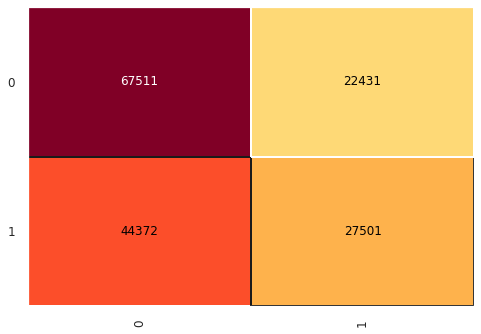

In [43]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [44]:
classification_naive_gaussian = (classification_report(y_test, previsoes))

In [45]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67     89942
           1       0.55      0.38      0.45     71873

    accuracy                           0.59    161815
   macro avg       0.58      0.57      0.56    161815
weighted avg       0.58      0.59      0.57    161815



#### Result Using the Normal Data, here we have 58,71% Accuracy, the model can't preview both outcomes, it's not a good model.

In [296]:
score_naive_gaussian = 0.5871643543552822

#### StandardScaler

0.5871334548713036

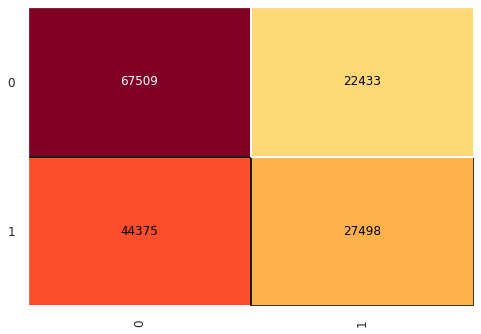

In [117]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [118]:
classification_naive_gaussian_standard = classification_report(y_test, previsoes)

In [119]:
print(classification_naive_gaussian_standard)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67     89942
           1       0.55      0.38      0.45     71873

    accuracy                           0.59    161815
   macro avg       0.58      0.57      0.56    161815
weighted avg       0.58      0.59      0.57    161815



#### Result Using the StandardScaler Data, its almost the same thing when using Normal Data, here we have 58,71% Accuracy, the model can't preview both outcomes, it's not a good model.

In [120]:
score_naive_gaussian_scaler = 0.5871334548713036

#### MinMax Scaler

0.5871334548713036

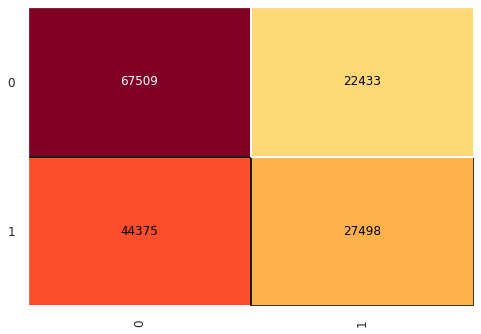

In [151]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [152]:
classification_naive_gaussian_minmax = classification_report(y_test, previsoes)

In [153]:
print(classification_naive_gaussian_minmax)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67     89942
           1       0.55      0.38      0.45     71873

    accuracy                           0.59    161815
   macro avg       0.58      0.57      0.56    161815
weighted avg       0.58      0.59      0.57    161815



#### Result Using the MinMaxSaler Data, its almost the same thing when using Normal/StandardScaler Data, here we have 58,71% Accuracy, the model can't preview both outcomes, it's not a good model.

In [154]:
score_naive_gaussian_minmax = 0.5871

#### Decision Tree

#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations, using our Normal Data.

#### Running Entropy Calculation.

In [121]:
arvore_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, random_state=0)

In [122]:
arvore_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [123]:
previsoes = arvore_entropy.predict(X_test)

#### Here we can see the tree and the decision rules.

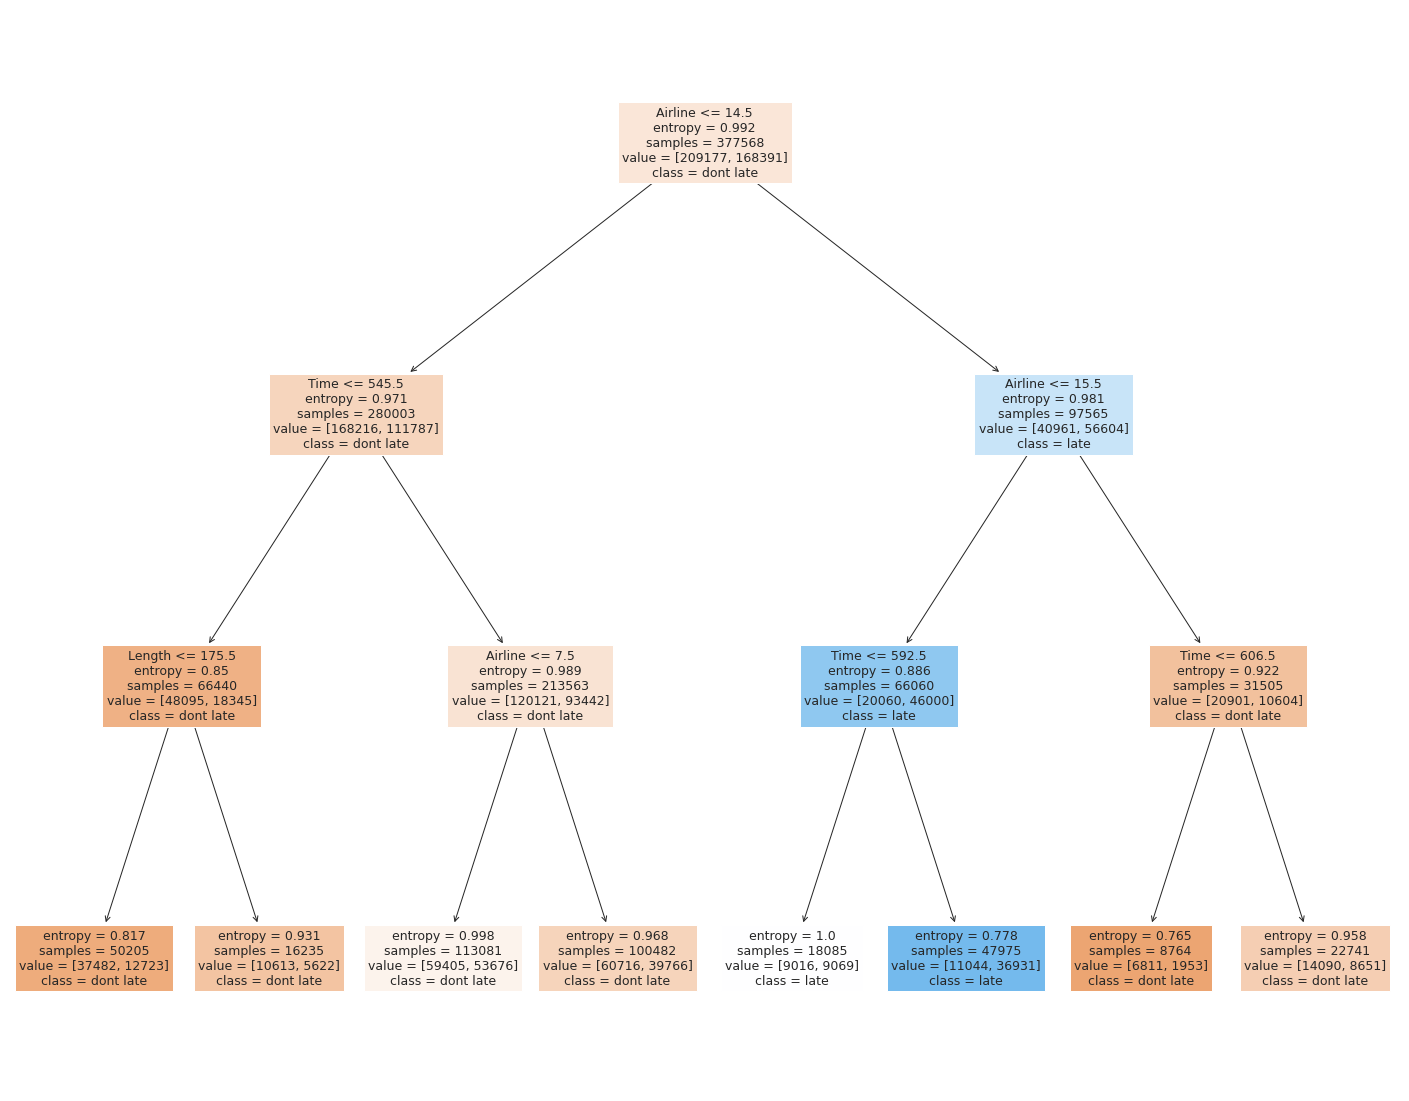

In [50]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=df.columns[:-1], class_names=['dont late', 'late'], filled=True);

#### Normal Data

0.6255229737663381

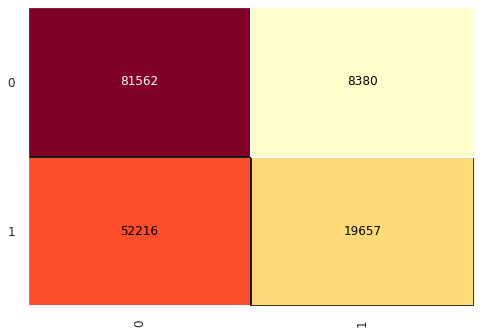

In [51]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [52]:
classification_decision_entropy = (classification_report(y_test, previsoes))

In [53]:
print(classification_decision_entropy)

              precision    recall  f1-score   support

           0       0.61      0.91      0.73     89942
           1       0.70      0.27      0.39     71873

    accuracy                           0.63    161815
   macro avg       0.66      0.59      0.56    161815
weighted avg       0.65      0.63      0.58    161815



#### Result Using the Normal Data, here we have 62,55% Accuracy, the model is good to preview when the fly will not be late, but it's not a good model.

In [54]:
score_tree_entropy = 0.6255

#### Checking the most important variables of the model

In [55]:
columns = df.iloc[:, 0:7].columns

In [56]:
feature_imp = pd.Series(arvore_entropy.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variables "Airline" and "Time" to make a decision about the Flight be late or no.

In [57]:
feature_imp

Airline        0.664998
Time           0.319672
Length         0.015330
Flight         0.000000
AirportFrom    0.000000
AirportTo      0.000000
DayOfWeek      0.000000
dtype: float64

#### Running Gini Calculation.

In [58]:
arvore_gini = DecisionTreeClassifier(max_depth= 3, random_state=0)

In [59]:
arvore_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [60]:
previsoes = arvore_gini.predict(X_test)

#### Here we can see the tree and the decision rules.

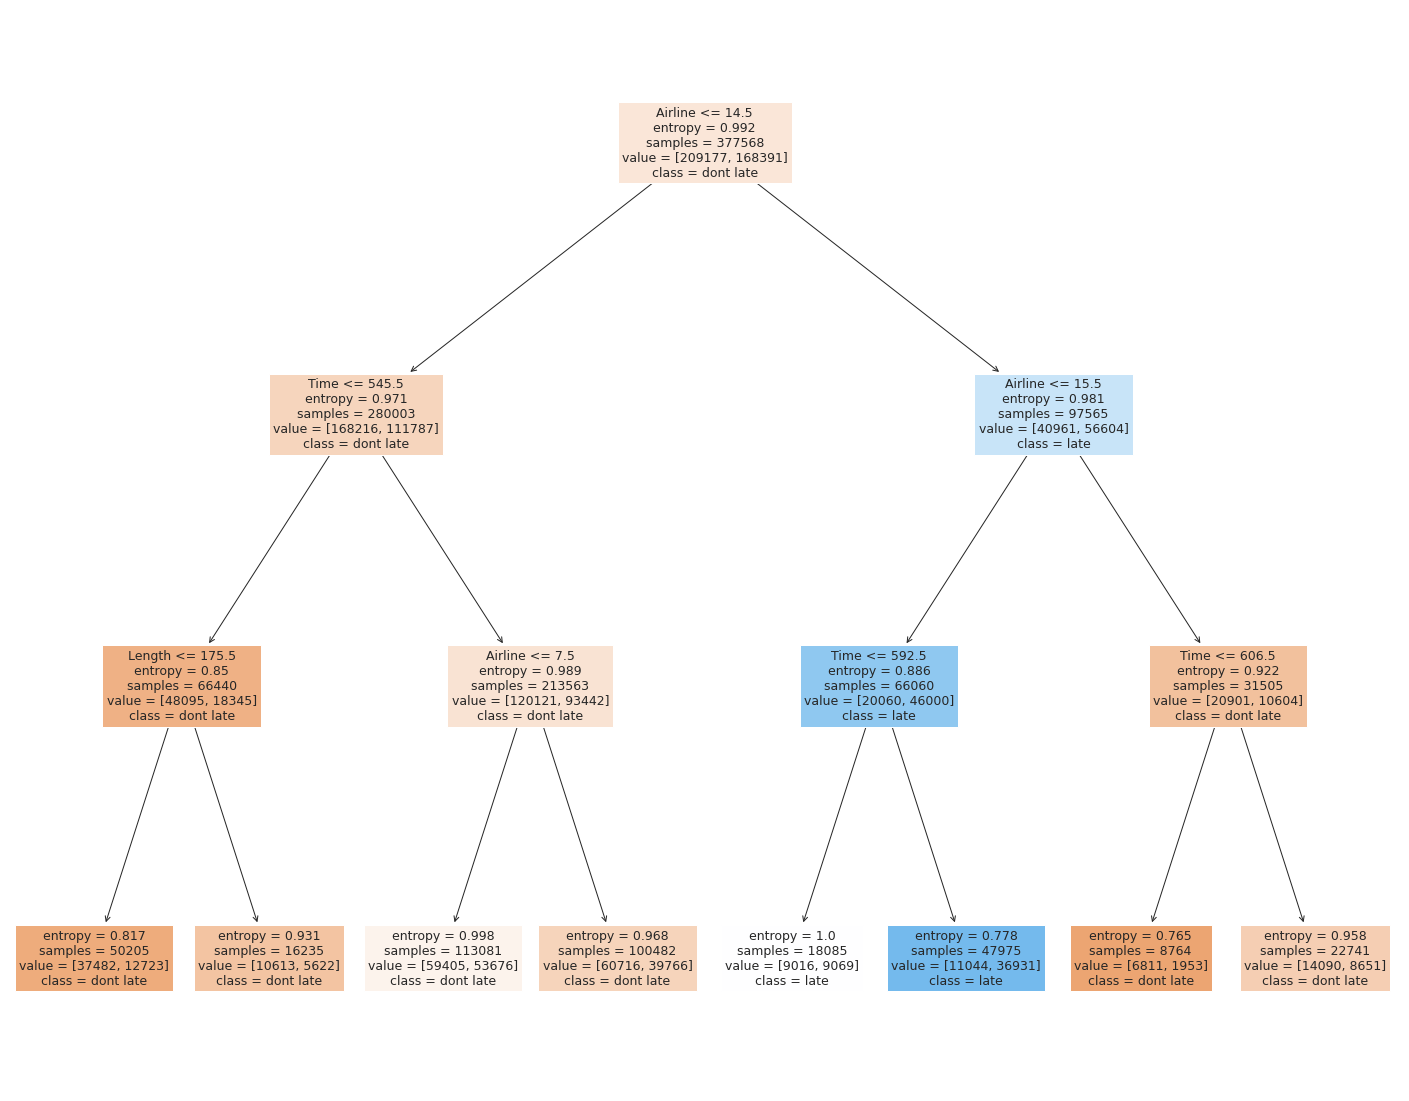

In [61]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=df.columns[:-1], class_names=['dont late', 'late'], filled=True);

#### Normal Data

0.6262089423106634

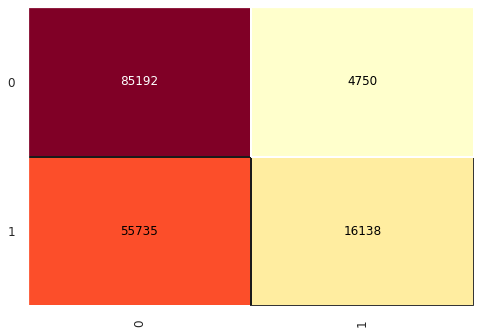

In [62]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [63]:
classification_decision_gini = (classification_report(y_test, previsoes))

In [64]:
print(classification_decision_gini)

              precision    recall  f1-score   support

           0       0.60      0.95      0.74     89942
           1       0.77      0.22      0.35     71873

    accuracy                           0.63    161815
   macro avg       0.69      0.59      0.54    161815
weighted avg       0.68      0.63      0.56    161815



#### Result Using the Normal Data, here we have 62,62% Accuracy, the model is good to preview when the fly will not be late, but it's not a good model.

In [65]:
score_tree_gini = 0.6262089423106634

#### Checking the most important variables of the model

In [66]:
feature_imp = pd.Series(arvore_gini.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variable "Airline" and "Time" to make a decision about the fly be late or no, its almost the same when we use "Entropy".

In [67]:
feature_imp

Airline        0.683418
Time           0.303341
Length         0.013241
Flight         0.000000
AirportFrom    0.000000
AirportTo      0.000000
DayOfWeek      0.000000
dtype: float64

#### Random Forest

#### Here we will use the Random Forest Model, we will test Entropy and Gini calculations, using our Normal Data.

#### Running Entropy Calculation.

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [70]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.6278033556839601

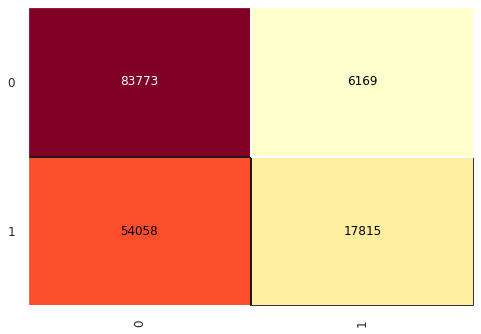

In [71]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [72]:
classification_random_entropy = (classification_report(y_test, previsoes))

In [73]:
print(classification_random_entropy)

              precision    recall  f1-score   support

           0       0.61      0.93      0.74     89942
           1       0.74      0.25      0.37     71873

    accuracy                           0.63    161815
   macro avg       0.68      0.59      0.55    161815
weighted avg       0.67      0.63      0.57    161815



#### Result Using the Normal Data, here we have 62,78% Accuracy, the model is good to preview when the fly will be late, but it's not a good model.

In [74]:
score_random_entropy = 0.6278033556839601

#### Checking the most important variables of the model

In [75]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variable "Airline" and "Time" to make a decision about the fly be late or no, but the difference here is that time has almost the same weight of Arline, different when we see the Decision Tree Model.

In [76]:
feature_imp

Airline        0.412551
Time           0.357931
Flight         0.086245
AirportTo      0.070035
Length         0.050024
AirportFrom    0.013180
DayOfWeek      0.010034
dtype: float64

#### Running Gini Calculation.

In [77]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [78]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.6275129005345611

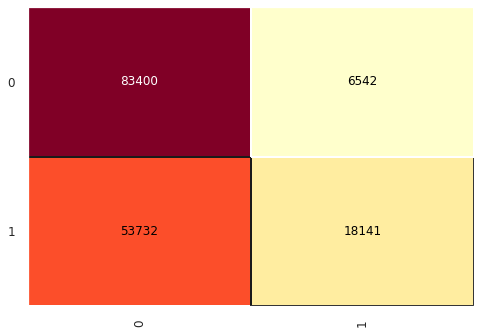

In [79]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [80]:
classification_random_gini = (classification_report(y_test, previsoes))

In [81]:
print(classification_random_gini)

              precision    recall  f1-score   support

           0       0.61      0.93      0.73     89942
           1       0.73      0.25      0.38     71873

    accuracy                           0.63    161815
   macro avg       0.67      0.59      0.56    161815
weighted avg       0.66      0.63      0.58    161815



#### Using Gini, we have almost the same results when comparing with Entropy, but Gini is a little worse.

In [82]:
score_random_gini = 0.6275129005345611

#### Checking the most important variables of the model

In [83]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### It's almost the same thing when we use the Entropy Model.

In [84]:
feature_imp

Airline        0.426550
Time           0.345926
Flight         0.086587
AirportTo      0.069137
Length         0.049145
AirportFrom    0.011465
DayOfWeek      0.011191
dtype: float64

#### KNN

#### Here we will use the KNN Model, using our Normal Data, StandardScaler Data and MinMax Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(metric = 'minkowski', p = 2)

#### Here we use the GridSearch Model to figure out the best metrics to use in this model.

In [87]:
k_list = list(range(1,31))

In [88]:
k_values = dict(n_neighbors = k_list)

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

In [91]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [92]:
grid.best_params_, grid.best_score_

({'n_neighbors': 8}, 0.6428881690911208)

#### Running KNN

In [155]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)

In [156]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [157]:
previsoes = knn.predict(X_test)

#### Normal Data

0.6493835552946265

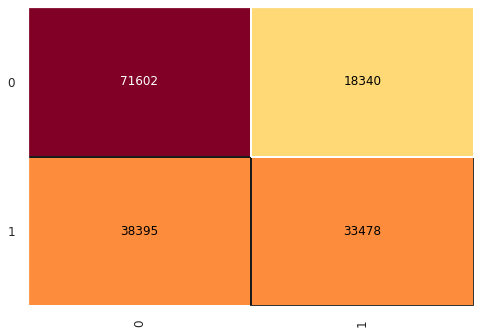

In [96]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [97]:
classification_knn = (classification_report(y_test, previsoes))

In [98]:
print(classification_knn)

              precision    recall  f1-score   support

           0       0.65      0.80      0.72     89942
           1       0.65      0.47      0.54     71873

    accuracy                           0.65    161815
   macro avg       0.65      0.63      0.63    161815
weighted avg       0.65      0.65      0.64    161815



#### Result Using the Normal Data, here we have 64,93% Accuracy, the model is good to preview when the fly will not be late, but it's not a good model.

In [99]:
score_knn = 0.6493835552946265

#### StandardScaler

0.6244723913110651

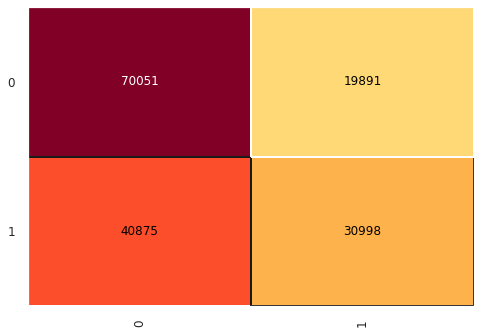

In [127]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [128]:
classification_knn_scaler = (classification_report(y_test, previsoes))

In [129]:
print(classification_knn_scaler)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     89942
           1       0.61      0.43      0.51     71873

    accuracy                           0.62    161815
   macro avg       0.62      0.61      0.60    161815
weighted avg       0.62      0.62      0.61    161815



#### Result Using the StandardScaler Data, its worse than using Normal Data, here we have 62,44% Accuracy, the model is good to preview when the fly will not be late, but it's not a good model.

In [130]:
score_knn_scaler = 0.6244

#### MinMaxScaler

0.6259926459228131

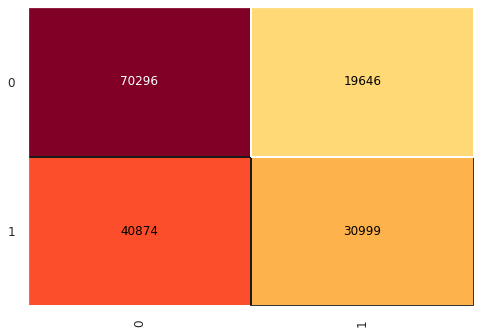

In [158]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [159]:
classification_knn_MinMax = (classification_report(y_test, previsoes))

In [160]:
print(classification_knn_MinMax)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     89942
           1       0.61      0.43      0.51     71873

    accuracy                           0.63    161815
   macro avg       0.62      0.61      0.60    161815
weighted avg       0.62      0.63      0.61    161815



#### Result Using the MinMax Scaler Data, its worse than using Normal Data, here we have 62,59% Accuracy, the model is good to preview when the fly will not be late, but it's not a good model.

In [161]:
score_knn_minmax = 0.6259

#### Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
logistic = LogisticRegression(random_state = 1)

In [164]:
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [165]:
previsoes = logistic.predict(X_test)

#### Normal Data

0.5698359237400735

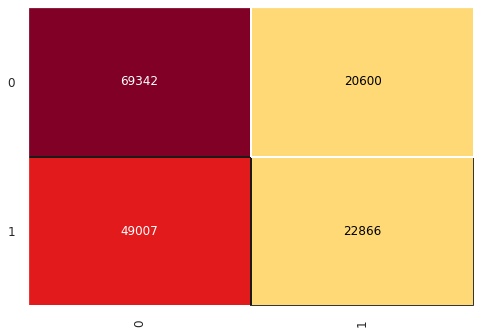

In [104]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [105]:
logistic_normal = (classification_report(y_test, previsoes))

In [106]:
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.59      0.77      0.67     89942
           1       0.53      0.32      0.40     71873

    accuracy                           0.57    161815
   macro avg       0.56      0.54      0.53    161815
weighted avg       0.56      0.57      0.55    161815



#### Result Using the Normal Data, here we have 56,98% Accuracy, the model is bad to preview both outcomes.

In [107]:
score_logistic = 0.5698359237400735

#### StandardScaler

0.5842598028612922

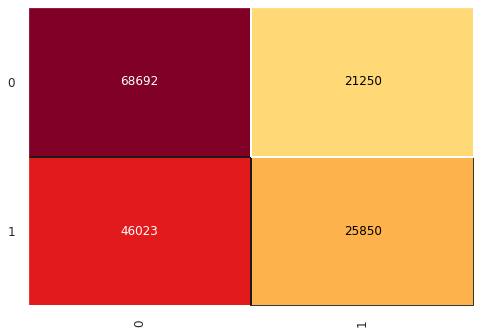

In [136]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [137]:
logistic_scaler = (classification_report(y_test, previsoes))

In [138]:
print(logistic_scaler)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67     89942
           1       0.55      0.36      0.43     71873

    accuracy                           0.58    161815
   macro avg       0.57      0.56      0.55    161815
weighted avg       0.58      0.58      0.57    161815



#### Result Using the StandardScaler Data, its better than using Normal Data, here we have 58,42% Accuracy, but it's not a good model.

In [139]:
logistic_standard = 0.5842598028612922

#### MinMax Scaler

0.5842289033773136

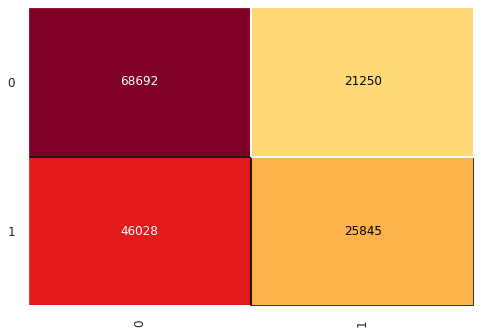

In [166]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [167]:
logistic_minmax = classification_report(y_test, previsoes)

In [168]:
print(logistic_minmax)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67     89942
           1       0.55      0.36      0.43     71873

    accuracy                           0.58    161815
   macro avg       0.57      0.56      0.55    161815
weighted avg       0.58      0.58      0.57    161815



#### Result Using the MinMax Scaler Data, its better than using Normal Data, here we have 58,42% Accuracy, but it's not a good model.

In [169]:
logistic_minmax = 0.5842

### Conclusion - First Part

#### After running the machine learning models, we can see that we didn't get good accuracy on most models, we can get some insights in our data analysis, like having some airlines that have more delay than others, when I look at our most important variables in Random Forest and Decision Tree, we can see that the models use the "Airline" and "Time" variables to decide when the flight is going to delay.

#### Now I'm going to Modify some variables in groups and see what we get better results with.

## <font color='blue'> 4. Grouping Variables. </font>

In [170]:
df = pd.read_csv('/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv', sep = ',')

#### Starting the process of grouping the Airline variable, here we only do the calculation to see the percentage of delay by Airline.

In [171]:
df_group = pd.pivot_table(data=df,values='id',index='Airline',columns='Delay',aggfunc='count')

In [172]:
df_group['Delay'] = df_group[1]
df_group['OnTime'] = df_group[0]

In [173]:
df_group['Total_flights']= df_group['Delay'] + df_group['OnTime']

In [174]:
df_group['Delay_index']= df_group['Delay']/df_group['Total_flights']
df_group.reset_index(inplace = True)

#### Starting the process of grouping the AirportTo variable, here we only do the calculation to see the percentage of delay by AirportTo.

In [175]:
df_group_airportTo = pd.pivot_table(data=df,values='id',index='AirportTo',columns='Delay',aggfunc='count')

In [176]:
df_group_airportTo['Delay'] = df_group_airportTo[1]
df_group_airportTo['OnTime'] = df_group_airportTo[0]

In [177]:
df_group_airportTo['Total_flights']= df_group_airportTo['Delay'] + df_group_airportTo['OnTime']

In [178]:
df_group_airportTo['Delay_index']= df_group_airportTo['Delay']/df_group_airportTo['Total_flights']
df_group_airportTo.reset_index(inplace = True)

#### Starting the process of grouping the AirportFrom variable, here we only do the calculation to see the percentage of delay by AirportFrom.

In [179]:
df_group_airportFrom = pd.pivot_table(data=df,values='id',index='AirportFrom',columns='Delay',aggfunc='count')

In [180]:
df_group_airportFrom['Delay'] = df_group_airportFrom[1]
df_group_airportFrom['OnTime'] = df_group_airportFrom[0]

In [181]:
df_group_airportFrom['Total_flights']= df_group_airportFrom['Delay'] + df_group_airportFrom['OnTime']

In [182]:
df_group_airportFrom['Delay_index']= df_group_airportFrom['Delay']/df_group_airportFrom['Total_flights']
df_group_airportFrom.reset_index(inplace = True)

#### here we are merging the result of the calculations done earlier into our original database.

In [183]:
df = pd.merge(df, df_group[['Airline', 'Delay_index']], on = ['Airline'], how = 'left')

In [184]:
df = pd.merge(df, df_group_airportFrom[['AirportFrom', 'Delay_index']], on = ['AirportFrom'], how = 'left')

In [185]:
df = pd.merge(df, df_group_airportTo[['AirportTo', 'Delay_index']], on = ['AirportTo'], how = 'left')

In [186]:
df.rename(columns={'Delay_index_x':'delay_airline'}, inplace=True)
df.rename(columns={'Delay_index_y':'delay_airportfrom'}, inplace=True)
df.rename(columns={'Delay_index':'delay_airportto'}, inplace=True)

#### here we are grouping the variables.
#### Below our new variables:

#### airline_group:
#### 0 - Airlines that has less than 30% of Delay.
#### 1 - Airlines that has porcentage of Delay between 30% and 45%
#### 2 - Airlines that has porcentage of Delay between 45% and 60%
#### 3 - Airlines that has more than 60% of Delay.

#### airportfrom_group:
#### 0 - Airport that has less than 25% of Delay.
#### 1 - Airport that has porcentage of Delay between 25% and 40%
#### 2 - Airport that has porcentage of Delay between 40% and 60%
#### 3 - Airport that has more than 60% of Delay.


#### airportto_group:
#### 0 - Airport that has less than 27% of Delay.
#### 1 - Airport that has porcentage of Delay between 27% and 40%
#### 2 - Airport that has porcentage of Delay between 40% and 60%
#### 3 - Airport that has more than 60% of Delay.

In [187]:
def airline(airline):
    if airline <= 0.30:
        return 0
    elif airline > 0.30 and airline <= 0.45:
        return 1
    elif airline > 0.45 and airline <= 0.60:
        return 2
    else:
        return 3

In [188]:
df['airline_group'] = df.apply(lambda x: airline(x['delay_airline']),axis=1)

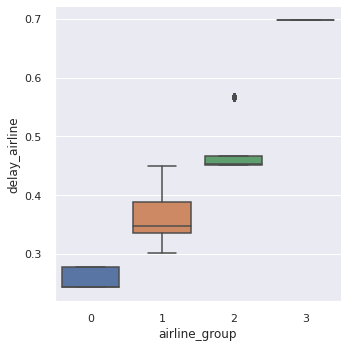

In [189]:
sns.catplot(x = 'airline_group', y="delay_airline", kind="box", data = df)

In [190]:
df['airline_group'].value_counts()

1    268507
2    150424
3     94097
0     26355
Name: airline_group, dtype: int64

In [191]:
def airportfrom(airport):
    if airport <= 0.25:
        return 0
    elif airport > 0.25 and airport <= 0.40:
        return 1
    elif airport > 0.40 and airport <= 0.60:
        return 2
    else:
        return 3

In [192]:
df['airportfrom_group'] = df.apply(lambda x: airportfrom(x['delay_airportfrom']),axis=1)

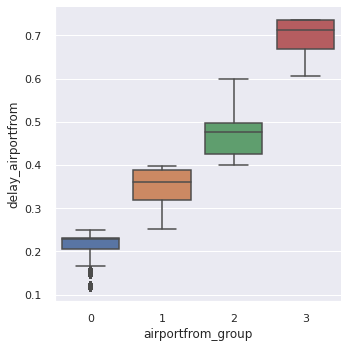

In [193]:
sns.catplot(x = 'airportfrom_group', y="delay_airportfrom", kind="box", data = df)

In [194]:
def airportto(airport):
    if airport <= 0.27:
        return 0
    elif airport > 0.27 and airport <= 0.40:
        return 1
    elif airport > 0.40 and airport <= 0.60:
        return 2
    else:
        return 3

In [195]:
df['airportto_group'] = df.apply(lambda x: airportto(x['delay_airportto']),axis=1)

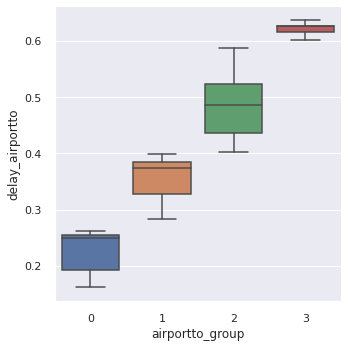

In [196]:
sns.catplot(x = 'airportto_group', y="delay_airportto", kind="box", data = df)

## <font color='blue'> 5. Data Analysis - Grouping Variables. </font>

##### Airline_group: We can see that most part of Airlines has between 30 and 45% of delay.

##### Airportfrom_group: We can see that most part of Airlines has between 40 and 60% of delay

##### Airportto_group: We can see that most part of Airlines has between 40 and 60% of delay

<AxesSubplot:xlabel='airportto_group', ylabel='count'>

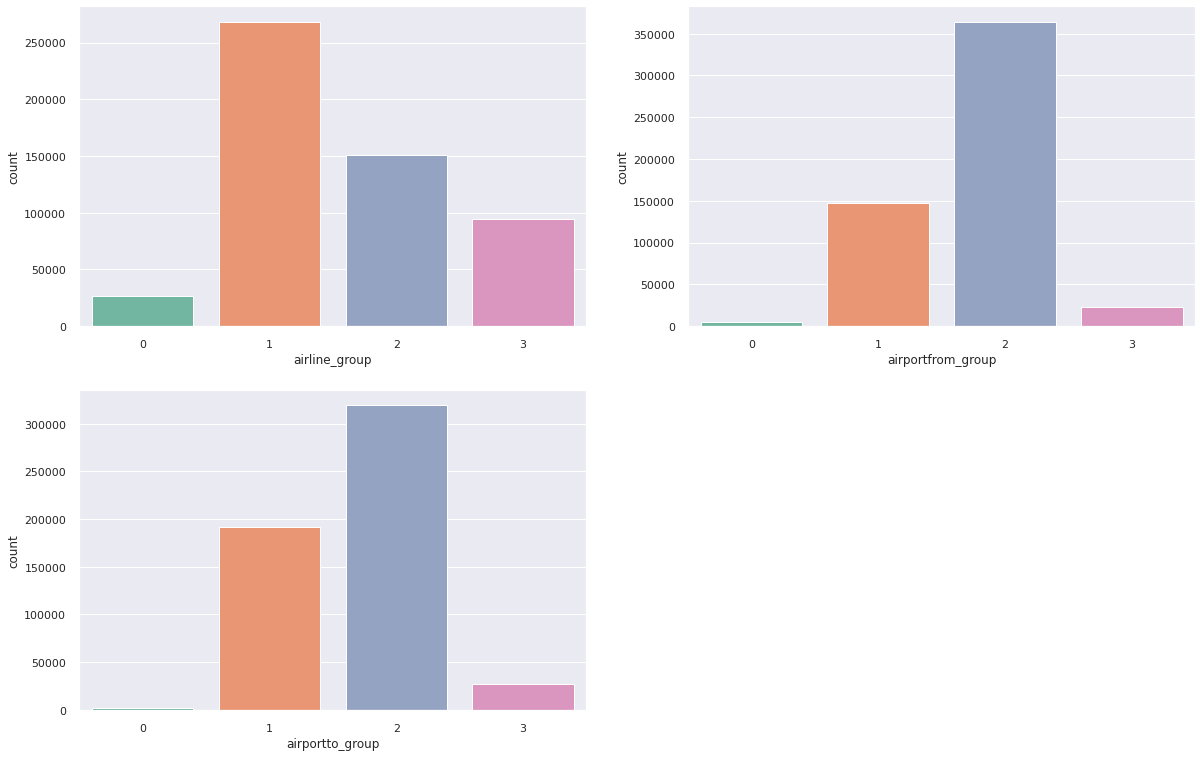

In [197]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'airline_group', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'airportfrom_group', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'airportto_group', palette='Set2', data = df)

In [198]:
df['airline_group'].value_counts()

1    268507
2    150424
3     94097
0     26355
Name: airline_group, dtype: int64

In [199]:
df['airportfrom_group'].value_counts()

2    364555
1    147402
3     22759
0      4667
Name: airportfrom_group, dtype: int64

In [200]:
df['airportto_group'].value_counts()

2    319313
1    191924
3     26704
0      1442
Name: airportto_group, dtype: int64

#### Here we can see that we have a good distribuition between the groups comparing with our variable target.

<AxesSubplot:xlabel='Delay', ylabel='count'>

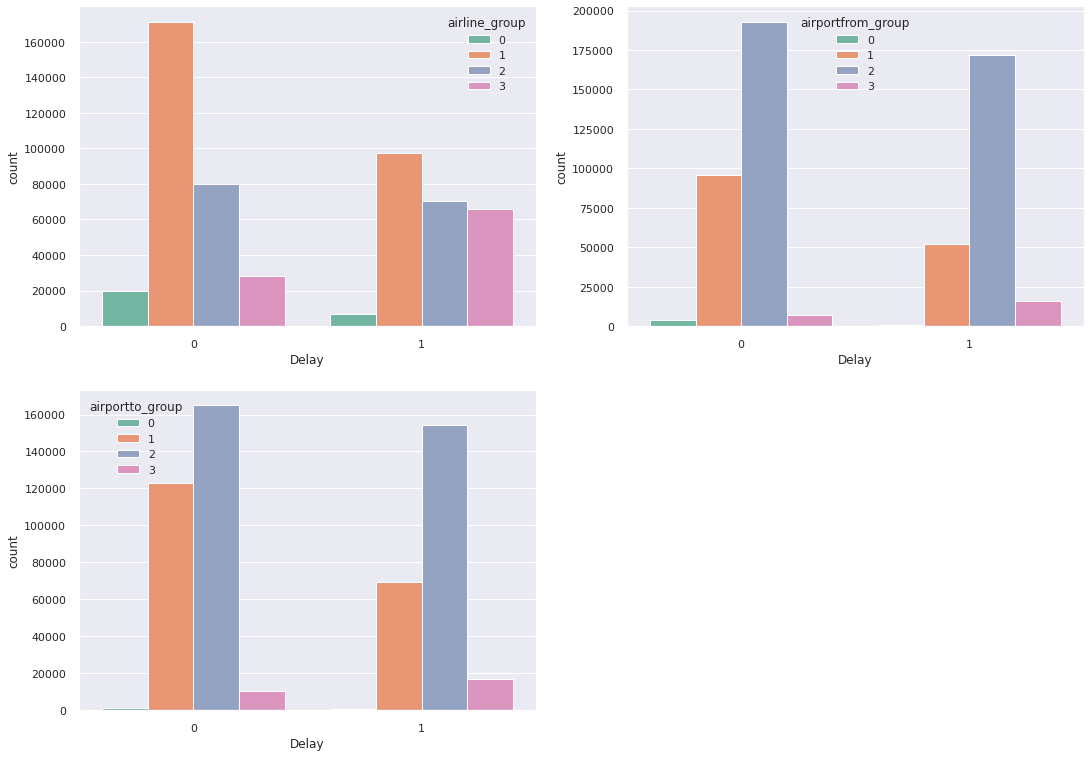

In [201]:
plt.figure(figsize = (18,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Delay', hue= 'airline_group', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Delay', hue= 'airportfrom_group', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Delay', hue= 'airportto_group', palette='Set2', data = df)

In [202]:
df = df.drop('id', 1)
df = df.drop('Airline', 1)
df = df.drop('AirportFrom', 1)
df = df.drop('AirportTo', 1)
df = df.drop('delay_airline', 1)
df = df.drop('delay_airportfrom', 1)
df = df.drop('delay_airportto', 1)
df = df.drop('Flight', 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/

In [205]:
df = df.reindex(['DayOfWeek', 'Time', 'Length', 'airline_group',
       'airportfrom_group', 'airportto_group', 'Delay'], axis=1)

#### Checking the correlation between our variables, here we can see that we don't have a strong correlation between the variables.

<AxesSubplot:>

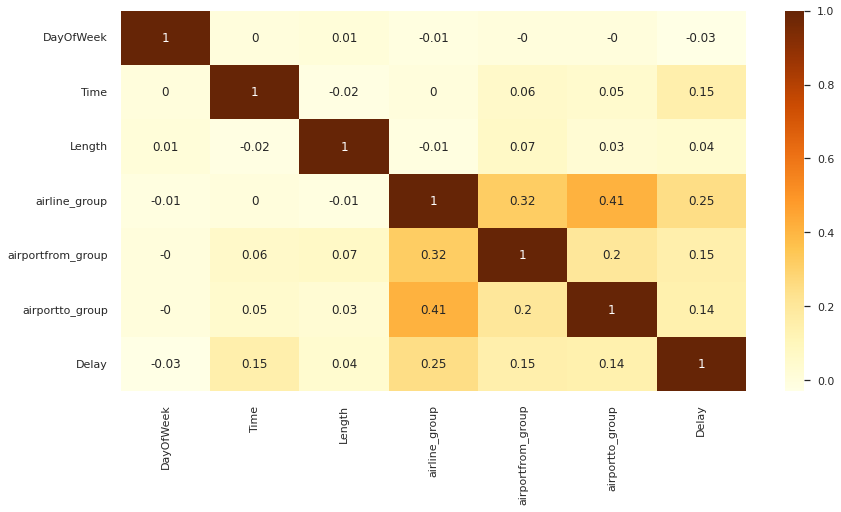

In [204]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

## <font color='blue'> 6. Model Building - Grouping Variables. </font>

#### Separating into features variables and target variable.

In [206]:
X = df.iloc[:, 0:6].values

In [207]:
y = df.iloc[:, 6].values

#### StandardScaler

In [274]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [275]:
X_standard[0]

array([-0.48555175, -2.83309217,  1.03823673,  0.5067665 ,  0.46253634,
        0.5518985 ])

#### MinMax Scaler

In [305]:
from sklearn.preprocessing import MinMaxScaler

In [306]:
obj_norm = MinMaxScaler().fit(X)

In [307]:
X_normalization = obj_norm.transform(X)

In [308]:
X_normalization[0]

array([0.33333333, 0.00349895, 0.3129771 , 0.66666667, 0.66666667,
       0.66666667])

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [208]:
from sklearn.model_selection import train_test_split

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)

In [310]:
X_train.shape, y_train.shape

((377568, 6), (377568,))

In [311]:
X_test.shape, y_test.shape

((161815, 6), (161815,))

#### Naive Bayes

#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data, StandardScaler Data and MinMax Data.

#### Running Gaussian Model.

In [312]:
from sklearn.naive_bayes import GaussianNB

In [313]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [314]:
previsoes = naive_bayes.predict(X_test)

In [315]:
confusao = confusion_matrix(y_test, previsoes)

#### Normal Data

0.6361832957389612

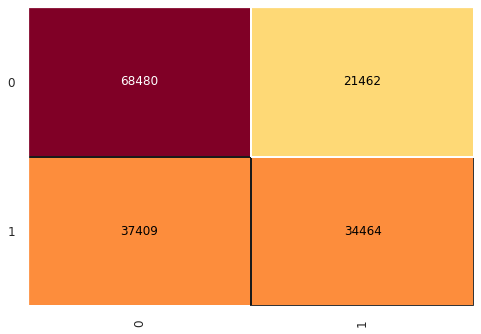

In [216]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [217]:
classification_naive_gaussian_group = (classification_report(y_test, previsoes))

In [218]:
print(classification_naive_gaussian_group)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     89942
           1       0.62      0.48      0.54     71873

    accuracy                           0.64    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.64      0.63    161815



#### Result Using the Normal Data, here we have 63,61% Accuracy, we can't predict both outcomes, its not a good model.

In [295]:
score_naive_gaussian_group = 0.6361832957389612

#### Standard Scaler

0.6361771158421654

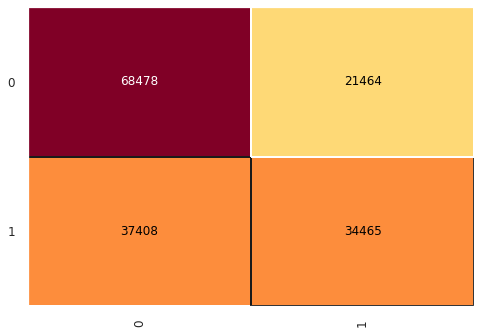

In [283]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [284]:
classification_naive_gaussian_standard_group = classification_report(y_test, previsoes)

In [285]:
print(classification_naive_gaussian_standard_group)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     89942
           1       0.62      0.48      0.54     71873

    accuracy                           0.64    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.64      0.63    161815



#### Result Using the StandardScaler, here we have 63,61% Accuracy, we can't predict both outcomes, its not a good model, its almost the same thing when we compare with Normal Data.

In [355]:
score_naive_gaussian_standard_group = 0.6361771158421654

#### MinMax Scaler

0.6361771158421654

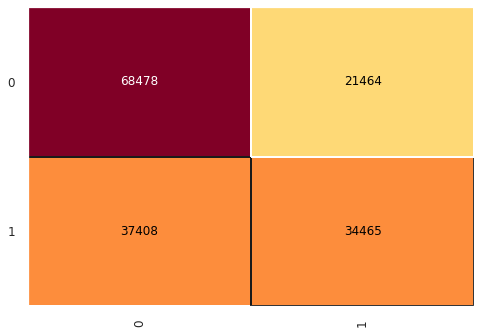

In [316]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [317]:
classification_naive_gaussian_minmax_group = classification_report(y_test, previsoes)

In [318]:
print(classification_naive_gaussian_minmax_group)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     89942
           1       0.62      0.48      0.54     71873

    accuracy                           0.64    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.64      0.63    161815



#### Result Using the MinMax Scaler, here we have 63,61% Accuracy, we can't predict both outcomes, its not a good model, its almost the same thing when we compare with Normal and StandardScaler Data.

In [352]:
score_naive_gaussian_minmax_group = 0.6361771158421654

#### Decision Tree

#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations, using our Normal Data.

#### Running Entropy Calculation.

In [220]:
arvore_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, random_state=0)

In [221]:
arvore_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [222]:
previsoes = arvore_entropy.predict(X_test)

#### Here we can see the tree and the decision rules.

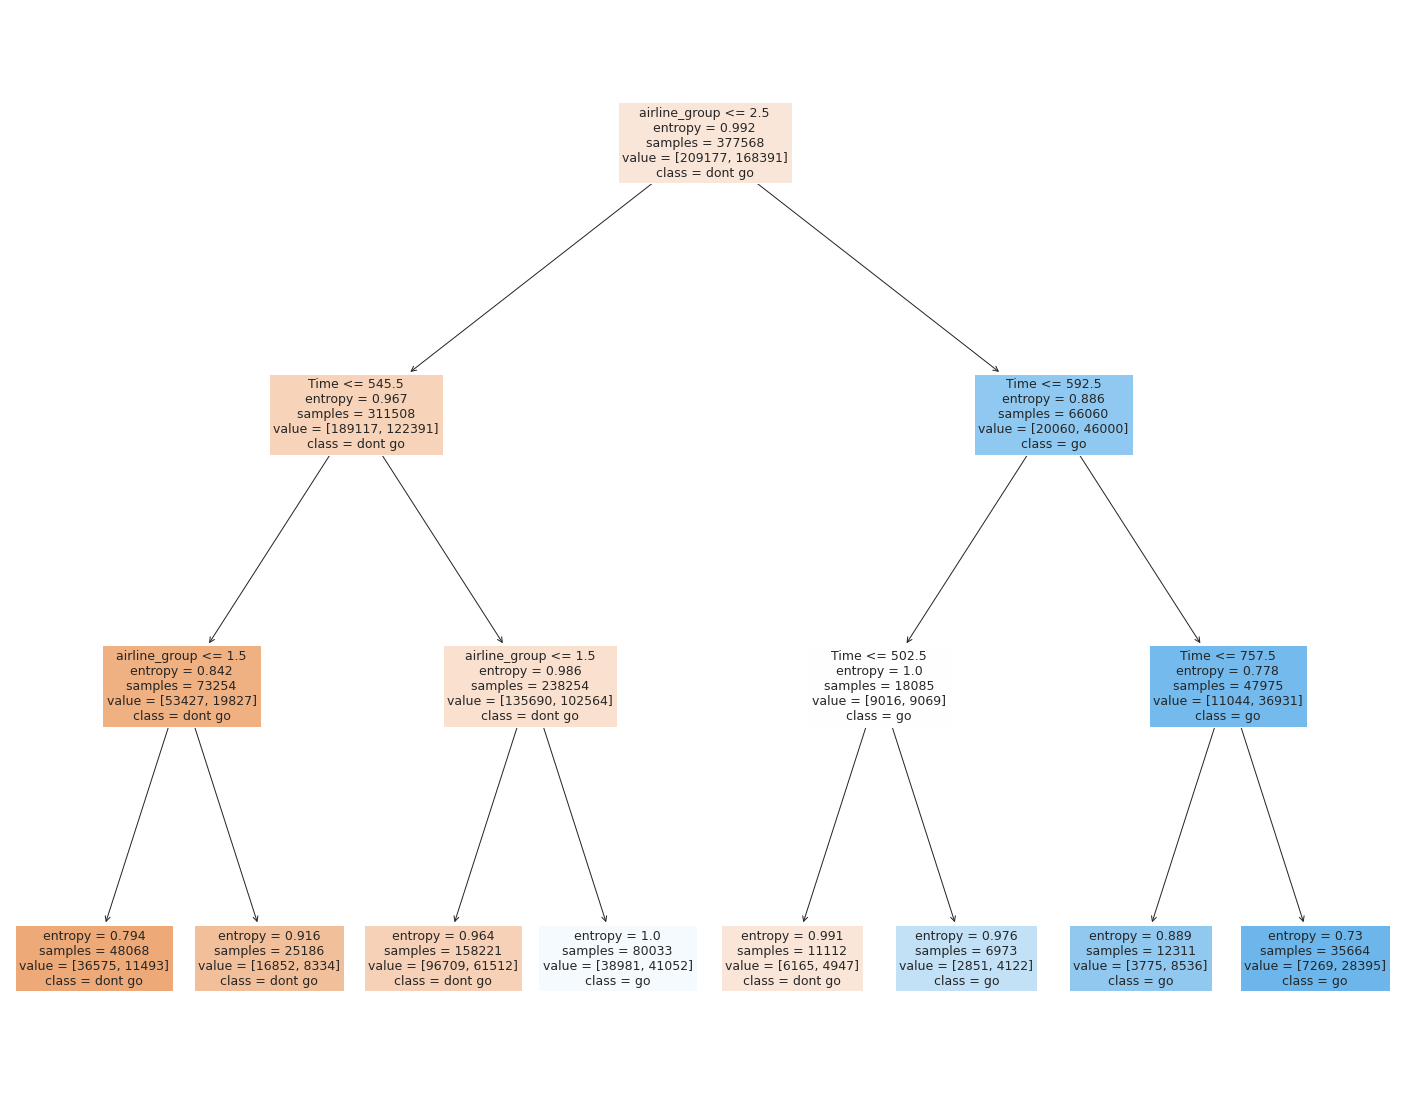

In [223]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=df.columns[:-1], class_names=['dont go', 'go'], filled=True);

#### Normal Data

0.6342119086611253

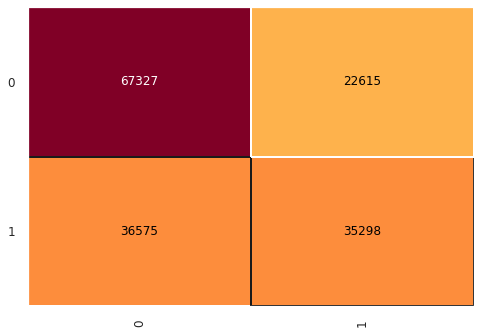

In [224]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [225]:
classification_decision_entropy_balance = (classification_report(y_test, previsoes))

In [226]:
print(classification_decision_entropy_balance)

              precision    recall  f1-score   support

           0       0.65      0.75      0.69     89942
           1       0.61      0.49      0.54     71873

    accuracy                           0.63    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.63      0.63    161815



#### Result Using the Normal Data, here we have 63,42% Accuracy, we can't predict both outcomes, its not a good model.

In [227]:
score_tree_entropy_group = 0.6342119086611253

#### Checking the most important variables of the model

In [228]:
columns = df.iloc[:, 0:6].columns

In [229]:
feature_imp = pd.Series(arvore_entropy.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variables "Airline_Group" and "Time" to make a decision about whether the Flight will be delayed or not, it is interesting because even after we group the variables, it is almost the same thing when we use the original data.

In [230]:
feature_imp

airline_group        0.68253
Time                 0.31747
DayOfWeek            0.00000
Length               0.00000
airportfrom_group    0.00000
airportto_group      0.00000
dtype: float64

#### Running Gini Calculation.

In [231]:
arvore_gini = DecisionTreeClassifier(max_depth= 3, random_state=0)

In [232]:
arvore_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [233]:
previsoes = arvore_gini.predict(X_test)

#### Here we can see the tree and the decision rules.

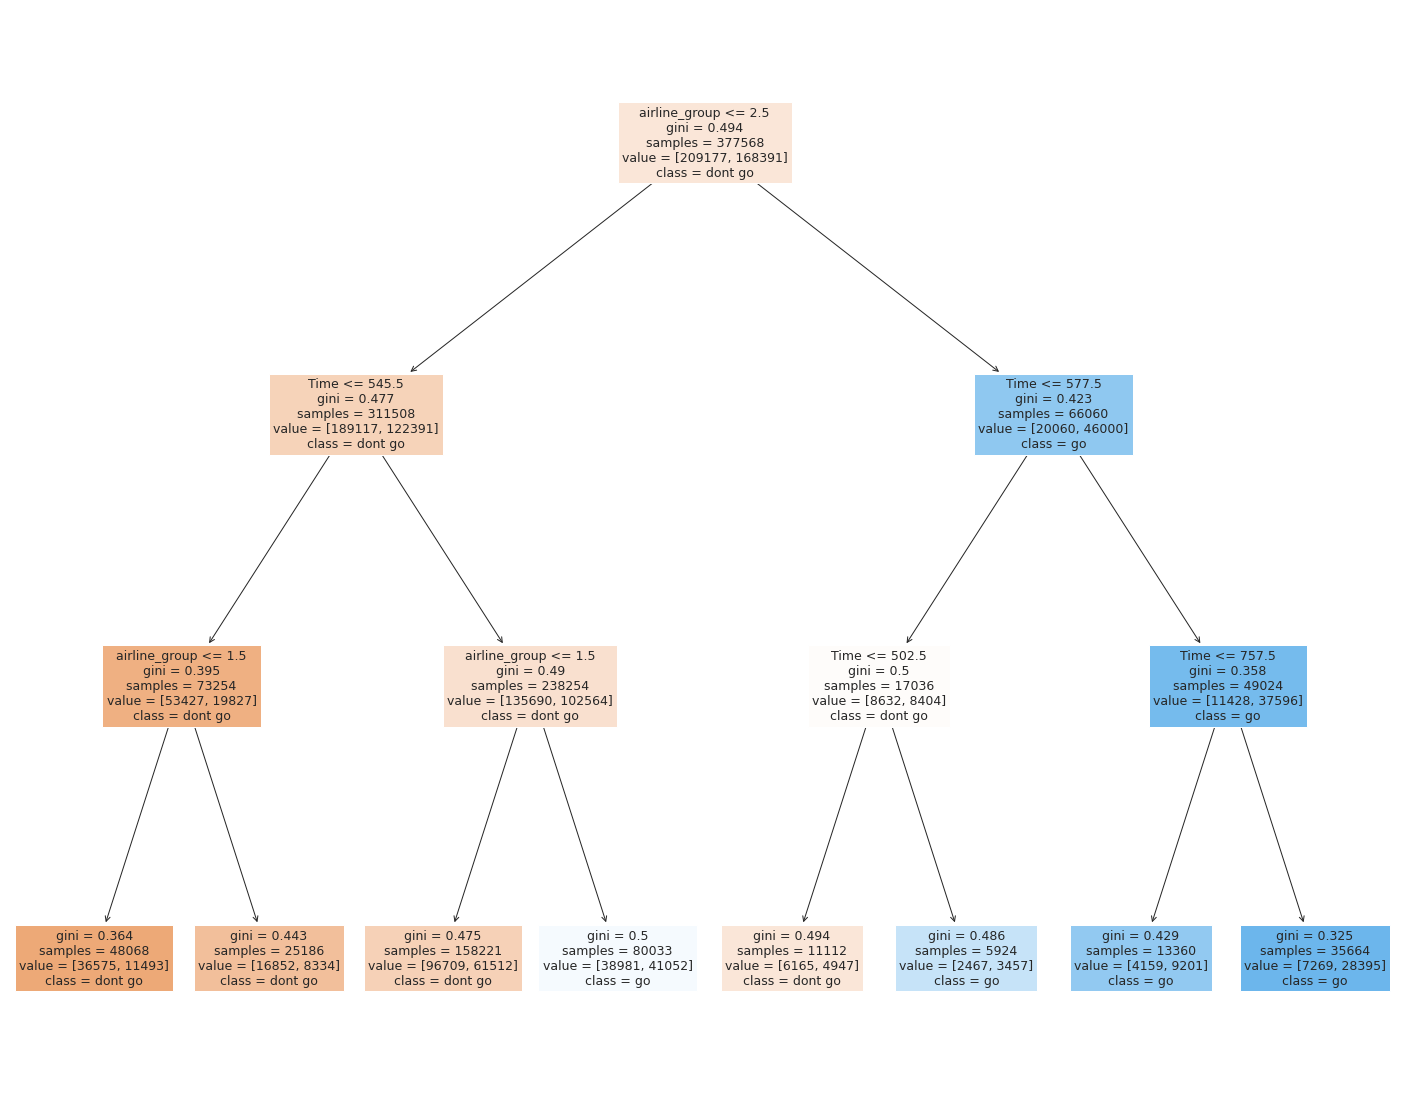

In [234]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_gini, feature_names=df.columns[:-1], class_names=['dont go', 'go'], filled=True);

#### Normal Data

0.6342119086611253

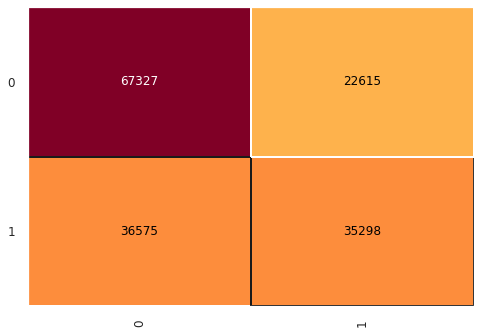

In [235]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [236]:
classification_decision_gini_group = (classification_report(y_test, previsoes))

In [237]:
print(classification_decision_gini_group)

              precision    recall  f1-score   support

           0       0.65      0.75      0.69     89942
           1       0.61      0.49      0.54     71873

    accuracy                           0.63    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.63      0.63    161815



#### Result Using the Normal Data, here we have 63,42% Accuracy, we can't predict both outcomes, its not a good model.

In [238]:
score_tree_gini_group = 0.6342119086611253

#### Checking the most important variables of the model

In [239]:
feature_imp = pd.Series(arvore_gini.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variables "Airline_Group" and "Time" to make a decision about whether the Flight will be delayed or not, it is interesting because even after we group the variables, it is almost the same thing when we use the original data, its almost the same thing when we use Entropy.

In [240]:
feature_imp

airline_group        0.69983
Time                 0.30017
DayOfWeek            0.00000
Length               0.00000
airportfrom_group    0.00000
airportto_group      0.00000
dtype: float64

#### Random Forest

#### Here we will use the Random Forest Model, we will test Entropy and Gini calculations, using our Normal Data.

#### Running Entropy Calculation.

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [243]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.6276426783672713

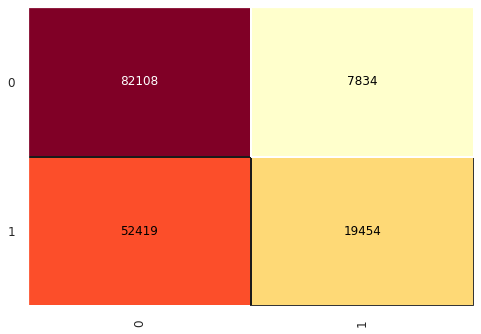

In [244]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [245]:
classification_random_entropy_group = (classification_report(y_test, previsoes))

In [246]:
print(classification_random_entropy_group)

              precision    recall  f1-score   support

           0       0.61      0.91      0.73     89942
           1       0.71      0.27      0.39     71873

    accuracy                           0.63    161815
   macro avg       0.66      0.59      0.56    161815
weighted avg       0.66      0.63      0.58    161815



#### Result Using the Normal Data, here we have 62,76% Accuracy, it's good to preview when the flight don't will be late, its not a good model.

In [247]:
score_random_entropy_group = 0.6276426783672713

#### Checking the most important variables of the model

In [248]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variables "Airline_Group" and "Time" to make a decision about whether the Flight will be delayed or not, it is interesting because even after we group the variables, it is almost the same thing when we use the original data, one thing to see here is that time is more heavy when we use Random Forest comparing with Decision Tree.

In [249]:
feature_imp

airline_group        0.497248
Time                 0.276776
airportto_group      0.106926
airportfrom_group    0.098556
Length               0.017384
DayOfWeek            0.003110
dtype: float64

#### Running Gini Calculation.

In [250]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [251]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.6275561598121311

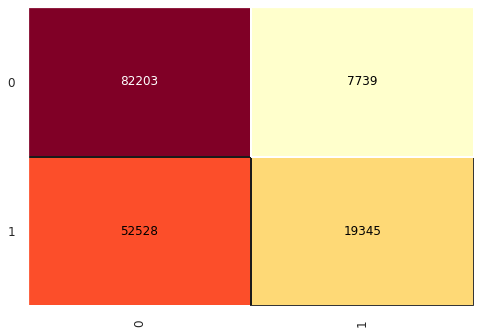

In [252]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [253]:
classification_random_gini_group = (classification_report(y_test, previsoes))

In [254]:
print(classification_random_gini_group)

              precision    recall  f1-score   support

           0       0.61      0.91      0.73     89942
           1       0.71      0.27      0.39     71873

    accuracy                           0.63    161815
   macro avg       0.66      0.59      0.56    161815
weighted avg       0.66      0.63      0.58    161815



#### Result Using the Normal Data, here we have 62,76% Accuracy, its almost the same thing when we compare with Entropy.

In [255]:
score_random_gini_group = 0.6275561598121311

#### Checking the most important variables of the model

In [256]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

#### Seeing the most important variable using this model, we can see that it uses the variables "Airline_Group" and "Time" to make a decision about whether the Flight will be delayed or not, it is interesting because even after we group the variables, it is almost the same thing when we use the original data, its almost the same thing when we use Entropy.

In [257]:
feature_imp

airline_group        0.504386
Time                 0.271404
airportto_group      0.105531
airportfrom_group    0.097908
Length               0.017912
DayOfWeek            0.002858
dtype: float64

#### KNN

#### Here we will use the KNN Model, using our Normal Data, StandardScaler Data and MinMax Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

In [258]:
from sklearn.neighbors import KNeighborsClassifier

#### Running KNN

In [320]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)

In [321]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [322]:
previsoes = knn.predict(X_test)

#### Normal Data

0.6356456447177332

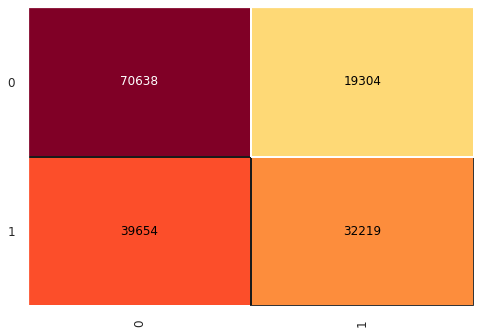

In [262]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [263]:
classification_knn_group = (classification_report(y_test, previsoes))

In [264]:
print(classification_knn_group)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71     89942
           1       0.63      0.45      0.52     71873

    accuracy                           0.64    161815
   macro avg       0.63      0.62      0.61    161815
weighted avg       0.63      0.64      0.62    161815



In [265]:
score_knn_group = 0.6356456447177332

#### Standard Scaler

0.6284584247443068

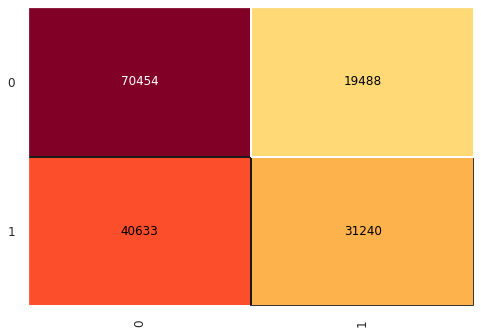

In [290]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [292]:
classification_knn_scaler_group = (classification_report(y_test, previsoes))

In [293]:
print(classification_knn_scaler_group)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     89942
           1       0.62      0.43      0.51     71873

    accuracy                           0.63    161815
   macro avg       0.63      0.61      0.61    161815
weighted avg       0.63      0.63      0.62    161815



#### Result Using the StandardScaler, here we have 62,84% Accuracy, we can't predict both outcomes, its not a good model, its worse when we compare with Normal Data.

In [294]:
score_knn_scaler_group = 0.6284584247443068

#### MinMax Scaler

0.6243240737879677

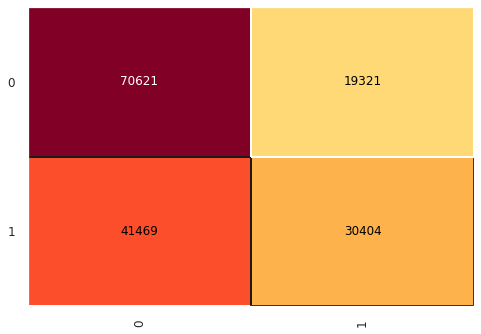

In [323]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [324]:
classification_knn_MinMax_group = (classification_report(y_test, previsoes))

In [325]:
print(classification_knn_MinMax_group)

              precision    recall  f1-score   support

           0       0.63      0.79      0.70     89942
           1       0.61      0.42      0.50     71873

    accuracy                           0.62    161815
   macro avg       0.62      0.60      0.60    161815
weighted avg       0.62      0.62      0.61    161815



#### Result Using the MinMax Scaler, here we have 62,43% Accuracy, we can't predict both outcomes, its not a good model, its worse when we compare with Normal and StandardScaler Data.

In [326]:
score_knn_minmax_group = 0.6243240737879677

#### Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegression

In [328]:
logistic = LogisticRegression(random_state = 1)

In [329]:
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [330]:
previsoes = logistic.predict(X_test)

#### Normal Data

0.634712480301579

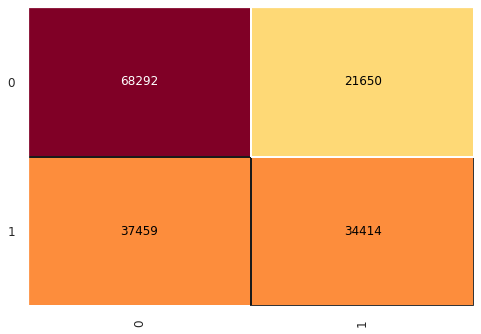

In [270]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [271]:
logistic_normal_group = classification_report(y_test, previsoes)

In [272]:
print(logistic_normal_group)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     89942
           1       0.61      0.48      0.54     71873

    accuracy                           0.63    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.63      0.63    161815



In [273]:
score_logistic_group = 0.634712480301579

#### StandardScaler

0.6347619194759447

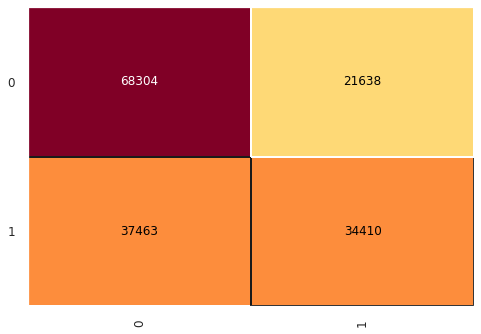

In [301]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [302]:
logistic_scaler_group = classification_report(y_test, previsoes)

In [303]:
print(logistic_scaler_group)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     89942
           1       0.61      0.48      0.54     71873

    accuracy                           0.63    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.63      0.63    161815



#### Result Using the StandardScaler, here we have 63,47% Accuracy, we can't predict both outcomes, its not a good model, its almost the same thing when we compare with Normal Data.

In [304]:
logistic_standard_group = 0.6347619194759447

#### MinMax Scaler

0.634755739579149

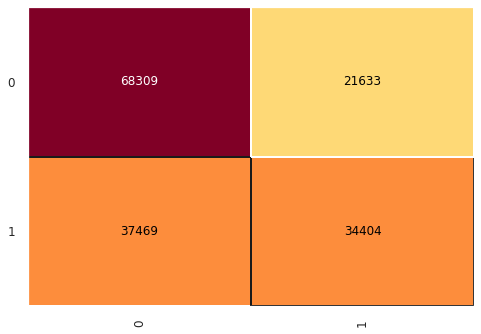

In [331]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [332]:
logistic_minmax_group = classification_report(y_test, previsoes)

In [333]:
print(logistic_minmax_group)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     89942
           1       0.61      0.48      0.54     71873

    accuracy                           0.63    161815
   macro avg       0.63      0.62      0.62    161815
weighted avg       0.63      0.63      0.63    161815



#### Result Using the StandardScaler, here we have 63,47% Accuracy, we can't predict both outcomes, its not a good model, its almost the same thing when we compare with Normal and StandardScaler Data.

In [334]:
logistic_minmax_group = 0.634755739579149

#### Checking the results

#### Normal Data

In [335]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Naive_dict_v2 = {'Model':'Naive Bayes',
               'Scaling':'Standard',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_scaler}

Naive_dict_v3 = {'Model':'Naive Bayes',
               'Scaling':'MinMax Scaler',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_minmax}

In [336]:
resumo = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),
                       'Naive_dict_v2':pd.Series(Naive_dict_v2),
                       'Naive_dict_v3':pd.Series(Naive_dict_v3),
                      })

In [337]:
Decision_dict_v1 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_tree_entropy}

Decision_dict_v2 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_tree_gini}

Random_dict_v1 = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_random_entropy}

Random_dict_v2 = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_random_gini}

In [338]:
resumo_random = pd.DataFrame({'Decision_dict_v1':pd.Series(Decision_dict_v1),
                       'Decision_dict_v2':pd.Series(Decision_dict_v2),
                       'Random_dict_v1':pd.Series(Random_dict_v1),
                       'Random_dict_v2':pd.Series(Random_dict_v2),
                      })

In [339]:
KNN_dict_v1 = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_scaler}

KNN_dict_v3 = {'Model':'KNN',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':score_knn_minmax}

In [340]:
resumo_knn = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2),
                       'KNN_dict_v3':pd.Series(KNN_dict_v3)
                      })

In [341]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

Logistic_dict_v2 = {'Model':'Logistic Regression',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':logistic_standard}

Logistic_dict_v3 = {'Model':'Logistic Regression',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':logistic_minmax}

In [342]:
resumo_logistic = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1),
                       'Logistic_dict_v2':pd.Series(Logistic_dict_v2),
                       'Logistic_dict_v3':pd.Series(Logistic_dict_v3)
                      })

In [343]:
resumo

,Naive_dict_v1,Naive_dict_v2,Naive_dict_v3
Model,Naive Bayes,Naive Bayes,Naive Bayes
Scaling,Normal Data,Standard,MinMax Scaler
Type,Gaussian,Gaussian,Gaussian
Precision,0.587164,0.587133,0.5871


In [344]:
resumo_random

,Decision_dict_v1,Decision_dict_v2,Random_dict_v1,Random_dict_v2
Model,Decision Tree,Decision Tree,Random Forest,Random Forest
Scaling,Normal Data,Normal Data,Normal Data,Normal Data
Type,Entropy,Gini,Entropy,Gini
Precision,0.6255,0.626209,0.627803,0.627513


In [345]:
resumo_knn

,KNN_dict_v1,KNN_dict_v2,KNN_dict_v3
Model,KNN,KNN,KNN
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.649384,0.6244,0.6259


In [346]:
resumo_logistic

,Logistic_dict_v1,Logistic_dict_v2,Logistic_dict_v3
Model,Logistic Regression,Logistic Regression,Logistic Regression
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,precision recall f1-score ...,0.58426,0.5842


#### Grouping Data

In [357]:
Naive_dict_group_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_group}

Naive_dict_group_v2 = {'Model':'Naive Bayes',
               'Scaling':'Standard',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_standard_group}

Naive_dict_group_v3 = {'Model':'Naive Bayes',
               'Scaling':'MinMax Scaler',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_minmax_group}

In [358]:
resumo_knn = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_group_v1),
                       'Naive_dict_v2':pd.Series(Naive_dict_group_v2),
                       'Naive_dict_v3':pd.Series(Naive_dict_group_v3),
                      })

In [359]:
Decision_dict_v1_group = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_tree_entropy_group}

Decision_dict_v2_group = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_tree_gini_group}

Random_dict_v1_group = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_random_entropy_group}

Random_dict_v2_group = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_random_gini_group}

In [360]:
resumo_random_group = pd.DataFrame({'Decision_dict_v1':pd.Series(Decision_dict_v1_group),
                       'Decision_dict_v2':pd.Series(Decision_dict_v2_group),
                       'Random_dict_v1':pd.Series(Random_dict_v1_group),
                       'Random_dict_v2':pd.Series(Random_dict_v2_group),
                      })

In [361]:
KNN_dict_v1_group = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn_group}

KNN_dict_v2_group = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_scaler_group}

KNN_dict_v3_group = {'Model':'KNN',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':score_knn_minmax_group}

In [362]:
resumo_knn_group = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1_group),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2_group),
                       'KNN_dict_v3':pd.Series(KNN_dict_v3_group)
                      })

In [363]:
Logistic_dict_v1_group = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal_group}

Logistic_dict_v2_group = {'Model':'Logistic Regression',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':logistic_standard_group}

Logistic_dict_v3_group = {'Model':'Logistic Regression',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':logistic_minmax_group}

In [370]:
resumo_logistic_group = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1_group),
                       'Logistic_dict_v2':pd.Series(Logistic_dict_v2_group),
                       'Logistic_dict_v3':pd.Series(Logistic_dict_v3_group)
                      })

In [365]:
resumo_knn

,Naive_dict_v1,Naive_dict_v2,Naive_dict_v3
Model,Naive Bayes,Naive Bayes,Naive Bayes
Scaling,Normal Data,Standard,MinMax Scaler
Type,Gaussian,Gaussian,Gaussian
Precision,0.636183,0.636177,0.636177


In [367]:
resumo_random_group

,Decision_dict_v1,Decision_dict_v2,Random_dict_v1,Random_dict_v2
Model,Decision Tree,Decision Tree,Random Forest,Random Forest
Scaling,Normal Data,Normal Data,Normal Data,Normal Data
Type,Entropy,Gini,Entropy,Gini
Precision,0.634212,0.634212,0.627643,0.627556


In [368]:
resumo_knn_group

,KNN_dict_v1,KNN_dict_v2,KNN_dict_v3
Model,KNN,KNN,KNN
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.635646,0.628458,0.624324


In [371]:
resumo_logistic_group

,Logistic_dict_v1,Logistic_dict_v2,Logistic_dict_v3
Model,Logistic Regression,Logistic Regression,Logistic Regression
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,precision recall f1-score ...,0.634762,0.634756


## <font color='blue'> 7. Conclusion. </font>

#### In this project we can see that we have numerical variables and some categorical variales, in our Data Visualization we can see that we have some Airlines that has more Delays than Anothers, the same thing when we See the Airports, its interesting that we have almost the same values in Delays and Not Delays.

#### When we look at machine learning models, we can't get a good models to preview when we have delay when we use our Original Data, even when we Scaling the data, then i decided to create new variables using your original data, transforming some values in groups, like Airline, Airport From and Airport To.

#### but even so we ended up not being able to create a good model to predict when the plane will have a delay with this data that we have available, to predict if the plane will not have a delay we got some good models.

#### Other interesting thing to see is the most important variables in the Decision Tree and Random ForestModel, We can see that the most important variable of model is Airline and our Second Variable is "Time", which shows us that these are the variables that most explain when the Flight will be Delayed or Not.

#### Maybe if we have more informations about the flights like such as weather forecast, time of year, or things that influence the use of planes, we could get better results.



#### Good Models to use (to preview when the flight will be not Delayed):

##### - Decision Tree (Original Data)
##### - Random Forest (Original Data and Grouping Data)


#### Good Models to use (to preview when the flight will be Delayed):

##### No One

### <font color='red'> if you liked the analysis, leave a "like" (up arrow), and comment what you think of the study, if you have any suggestions I would be happy to hear from you.
</font>